<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-07 03:30:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  52.0MB/s    in 3.8s    

2025-07-07 03:30:19 (53.0 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 177.9 MB/s eta 0:00:00


In [12]:
!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


       CompTotal
0      2040000.0
1        28000.0
2        85000.0
3        50000.0
4       110000.0
...          ...
33735    36000.0
33736    40000.0
33737    61000.0
33738    58000.0
33739    55000.0

[33740 rows x 1 columns]


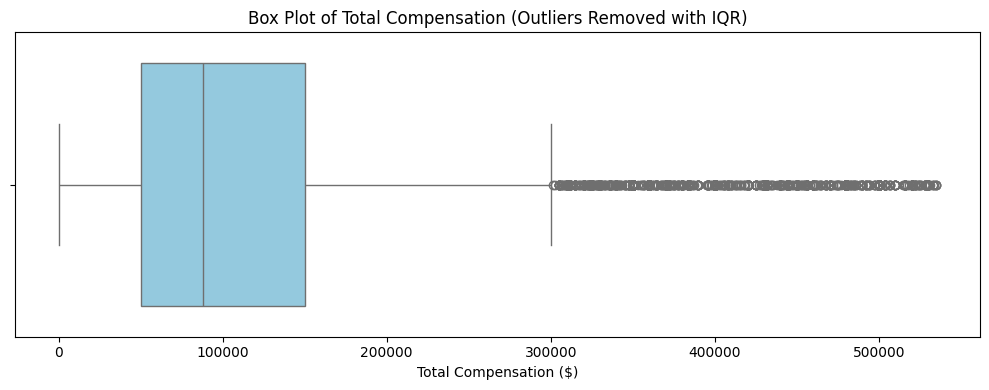

In [16]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main WHERE CompTotal is not null
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_clean = df[df['CompTotal'].notnull()]

Q1 = df_clean['CompTotal'].quantile(0.25)
Q3 = df_clean['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ outliers
df_no_outliers = df_clean[(df_clean['CompTotal'] >= lower_bound) & (df_clean['CompTotal'] <= upper_bound)]

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_no_outliers['CompTotal'], color='skyblue')

plt.title('Box Plot of Total Compensation (Outliers Removed with IQR)')
plt.xlabel('Total Compensation ($)')
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


                      Age
0      Under 18 years old
1         35-44 years old
2         45-54 years old
3         18-24 years old
4         18-24 years old
...                   ...
65432     18-24 years old
65433     25-34 years old
65434     25-34 years old
65435     18-24 years old
65436     18-24 years old

[65437 rows x 1 columns]


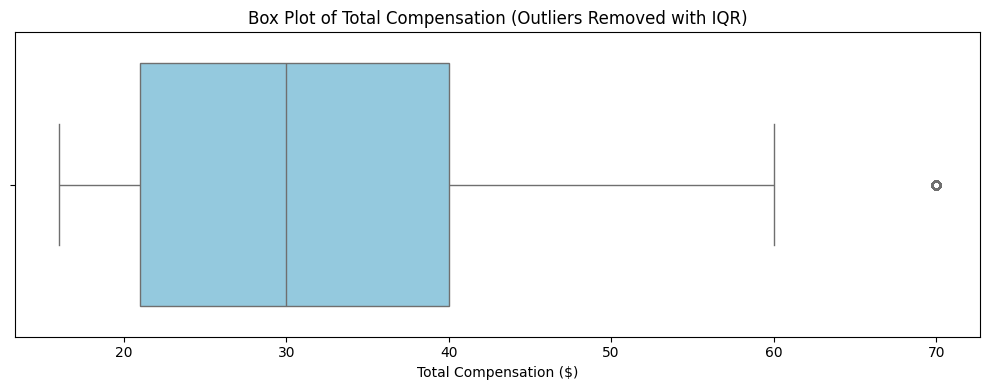

In [18]:
# your code goes here
QUERY = """
SELECT Age
FROM main WHERE Age is not null
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

age_map = {
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Under 18 years old': 16,
    'Prefer not to say': None
}

df['AgeNum'] = df['Age'].map(age_map)

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['AgeNum'], color='skyblue')

plt.title('Box Plot of Total Compensation (Outliers Removed with IQR)')
plt.xlabel('Total Compensation ($)')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_301/117428857.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers, x='Age', y='CompTotal', palette='Set3')


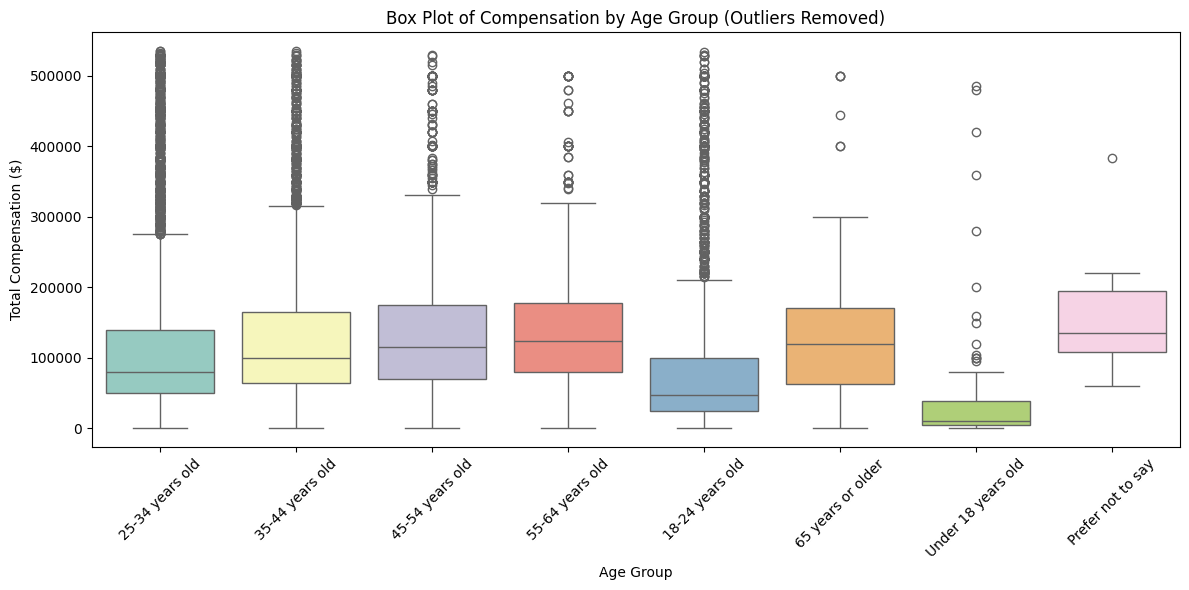

In [19]:
# your code goes here
import seaborn as sns
QUERY = """
SELECT CompTotal, Age
FROM main where CompTotal is not null and Age is not null
"""
df = pd.read_sql_query(QUERY, conn)

# Ép kiểu CompTotal về dạng số
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Bước 3: Tính ngưỡng loại outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Bước 4: Lọc bỏ các dòng bị outlier
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='Age', y='CompTotal', palette='Set3')

plt.title('Box Plot of Compensation by Age Group (Outliers Removed)')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_301/1546413691.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobSatGroup'] = pd.cut(df_filtered['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_301/1546413691.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='JobSatGroup', y='CompTotal', palette='Set3')


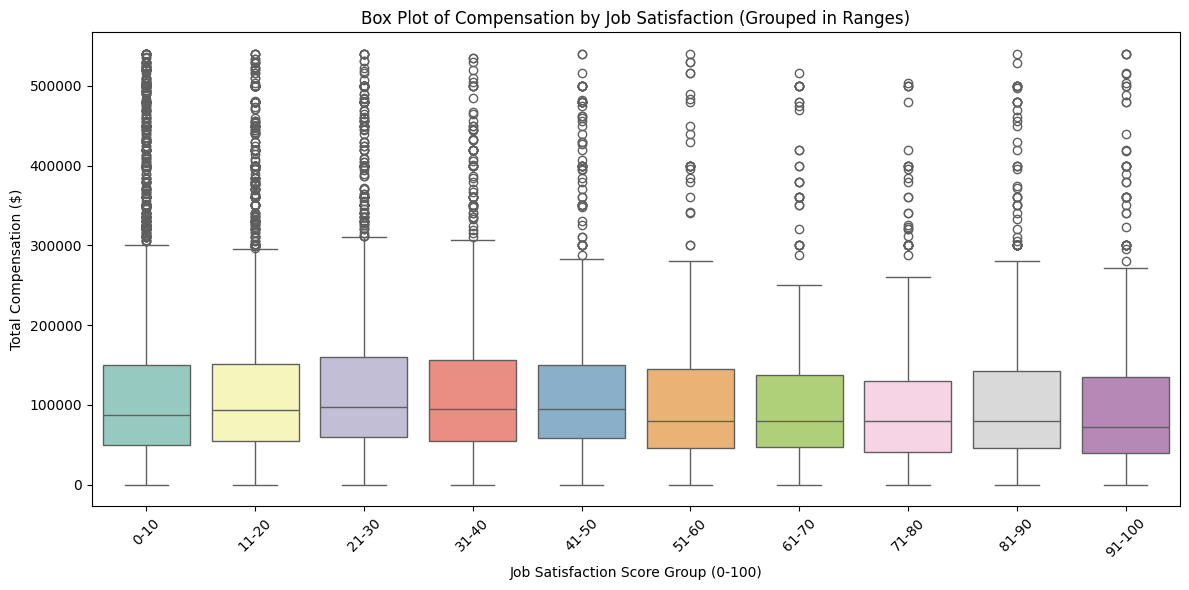

In [22]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main where CompTotal is not null and JobSatPoints_6 is not null
"""
df = pd.read_sql_query(QUERY, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

df_clean = df[['CompTotal', 'JobSatPoints_6']].dropna()

Q1 = df_clean['CompTotal'].quantile(0.25)
Q3 = df_clean['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_clean[(df_clean['CompTotal'] >= lower_bound) & (df_clean['CompTotal'] <= upper_bound)]

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', 
          '51-60', '61-70', '71-80', '81-90', '91-100']

df_filtered['JobSatGroup'] = pd.cut(df_filtered['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='JobSatGroup', y='CompTotal', palette='Set3')

plt.title('Box Plot of Compensation by Job Satisfaction (Grouped in Ranges)')
plt.xlabel('Job Satisfaction Score Group (0-100)')
plt.ylabel('Total Compensation ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [26]:
from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)  # Hiển thị kiểu $1,000,000

/tmp/ipykernel_301/1843172051.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly', palette='Set2')


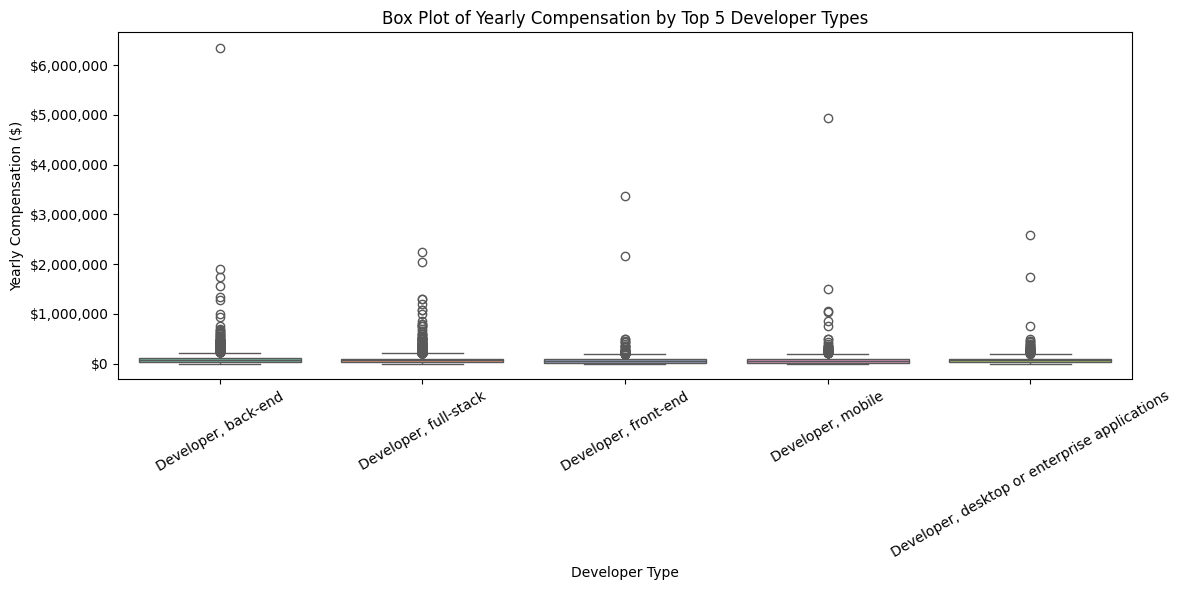

In [28]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main where ConvertedCompYearly is not null and DevType is not null
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

top_5_devtypes = df['DevType'].value_counts().nlargest(5).index
df_top5 = df[df['DevType'].isin(top_5_devtypes)]
df_top5.head()

plt.figure(figsize=(12, 6))

ax = sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly', palette='Set2')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.title('Box Plot of Yearly Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation ($)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_301/1828110328.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_iqr_cleaned = df_top5.groupby('Country', group_keys=False).apply(remove_outliers_iqr)
/tmp/ipykernel_301/1828110328.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_iqr_cleaned, x='Country', y='CompTotal', palette='Set3')


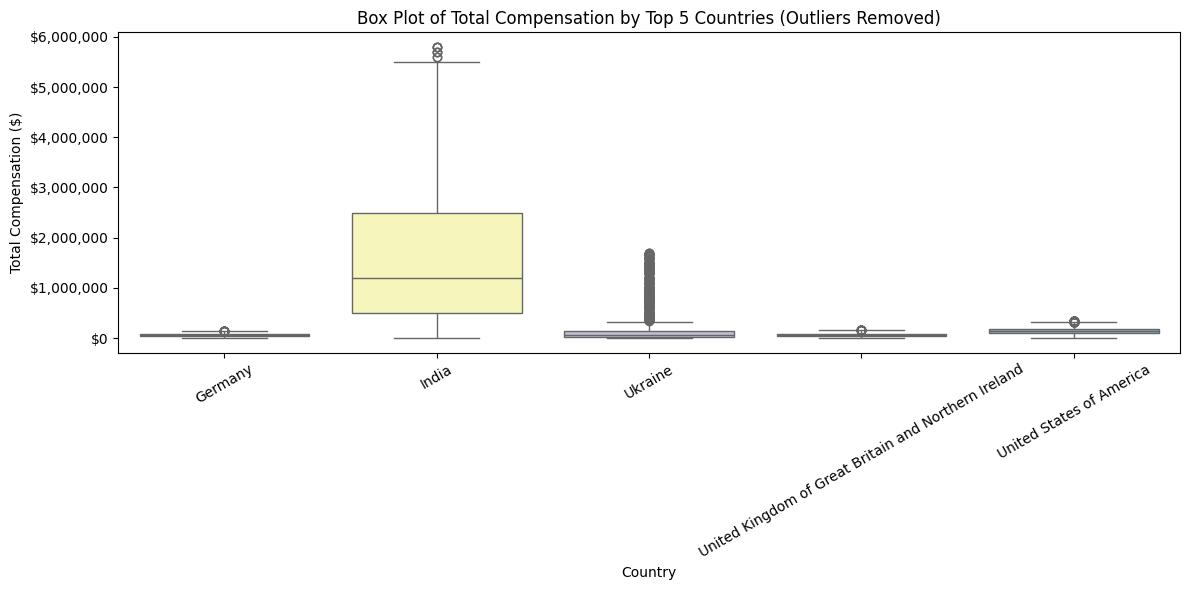

In [30]:
# your code goes here
from matplotlib.ticker import FuncFormatter
QUERY = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['Country'].isin(top_5_countries)].copy()
df_top5['CompTotal'] = pd.to_numeric(df_top5['CompTotal'], errors='coerce')

def remove_outliers_iqr(group):
    Q1 = group['CompTotal'].quantile(0.25)
    Q3 = group['CompTotal'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['CompTotal'] >= lower) & (group['CompTotal'] <= upper)]

# Áp dụng theo từng quốc gia
df_iqr_cleaned = df_top5.groupby('Country', group_keys=False).apply(remove_outliers_iqr)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_iqr_cleaned, x='Country', y='CompTotal', palette='Set3')

# Định dạng trục Y kiểu tiền
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.title('Box Plot of Total Compensation by Top 5 Countries (Outliers Removed)')
plt.xlabel('Country')
plt.ylabel('Total Compensation ($)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [31]:
# your code goes here
# your code goes here

QUERY = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head()




,CompTotal,Employment
0,2040000.0,"Employed, full-time;Student, full-time;Indepen..."
1,28000.0,"Employed, full-time"
2,85000.0,"Employed, full-time"
3,50000.0,"Independent contractor, freelancer, or self-em..."
4,110000.0,"Employed, full-time;Student, part-time"


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
